Text(0, 0.5, 'Progression Progress')

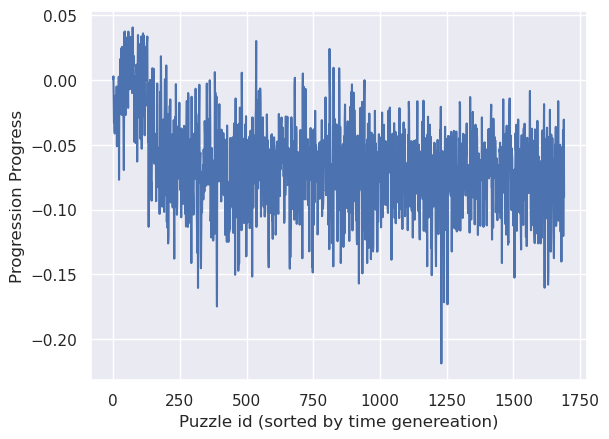

In [3]:
import sys
sys.path.append('/home/flowers/work/OpenELM')
import pickle
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from openelm.environments.p3.p3 import P3ProbSolResult

snapshot_path= "/home/flowers/work/OpenELM/logs/elm/24-02-05_15:39/step_130/maps.pkl"
with open(snapshot_path, "rb") as f:
    maps = pickle.load(f)

genomes = maps
# fitnesses = maps["fitnesses"]
# genomes = maps["genomes"]
# non_zeros = maps["nonzero"]
list_fitness=[]
list_idx_gen=[puz.idx_generation for puz in genomes]
for puz in genomes.archive:
    if hasattr(puz, "fitnessPP"):
        list_fitness.append(puz.fitnessPP)
plt.plot(list_fitness)
plt.xlabel("Puzzle id (sorted by time generation)")
plt.ylabel("Progression Progress")

Text(0, 0.5, 'Progression Progress')

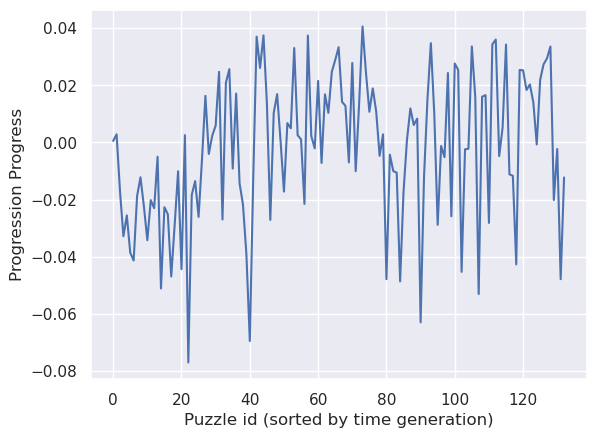

In [19]:
list_fitness=[]
list_idx_gen=[puz.idx_generation for puz in genomes]
for puz in genomes.archive:
    if hasattr(puz, "fitnessPP") and puz.idx_generation==-1:
        list_fitness.append(puz.fitnessPP)
x= np.arange(len(list_fitness))-1
# plt.scatter(x,list_fitness)
plt.plot(list_fitness)
plt.xlabel("Puzzle id (sorted by time generation)")
plt.ylabel("Progression Progress")


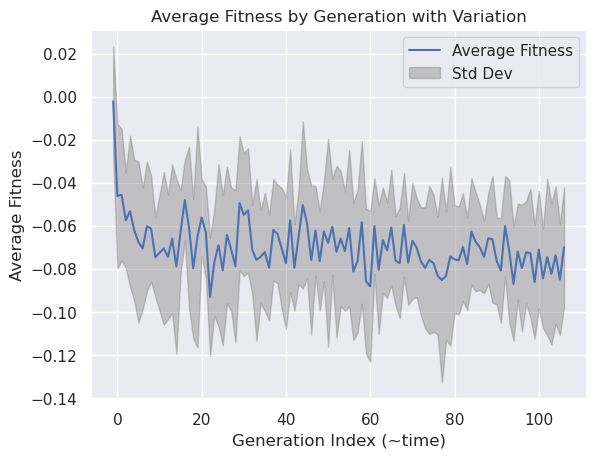

In [17]:


# Assuming list_fitness and list_idx_gen are populated as per your context
list_fitness = []  # This will be populated with fitness values
list_idx_gen = [puz.idx_generation for puz in genomes]  # Generation indices

# Placeholder for genomes.archive processing to fill list_fitness
for puz in genomes.archive:
    if hasattr(puz, "fitnessPP"):
        list_fitness.append(puz.fitnessPP)

# Map each generation index to its fitness values
fitness_per_generation = defaultdict(list)
for idx, fitness in zip(list_idx_gen, list_fitness):
    fitness_per_generation[idx].append(fitness)

# Calculate the average fitness and standard deviation per generation
avg_fitness_per_gen = {}
std_dev_fitness_per_gen = {}
for gen, fitnesses in fitness_per_generation.items():
    avg_fitness_per_gen[gen] = np.mean(fitnesses)
    std_dev_fitness_per_gen[gen] = np.std(fitnesses)

# Sort the generations to plot them in order
sorted_gen_indices = sorted(avg_fitness_per_gen.keys())
sorted_avg_fitness = [avg_fitness_per_gen[gen] for gen in sorted_gen_indices]
sorted_std_dev_fitness = [std_dev_fitness_per_gen[gen] for gen in sorted_gen_indices]

# Calculate the upper and lower bounds for the fill
upper_bound = [avg + std for avg, std in zip(sorted_avg_fitness, sorted_std_dev_fitness)]
lower_bound = [avg - std for avg, std in zip(sorted_avg_fitness, sorted_std_dev_fitness)]

# Plotting
plt.plot(sorted_gen_indices, sorted_avg_fitness, label='Average Fitness')
plt.fill_between(sorted_gen_indices, lower_bound, upper_bound, color='gray', alpha=0.4, label='Std Dev')
plt.xlabel("Generation Index (~time)")
plt.ylabel("Average Fitness")
plt.title("Average Fitness by Generation with Variation")
plt.legend()
plt.show()
